#  performance

In [11]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["performance.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_performance=df
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std,scenario
0,hpccrandomringbw,16,1,1,1.838318,0.058102,none
1,hpccdgemm,16,1,1,22.741325,3.226665,none
2,hpccstream,16,1,1,4.605070,0.613259,none
3,nasep,16,1,1,35.962500,0.578894,none
4,hpccfft,16,1,1,11.327325,1.690877,none
5,hpccrandomringbw,16,1,1,1.891882,0.010379,cpumem
6,hpccdgemm,16,1,1,30.867425,0.807578,cpumem
7,hpccstream,16,1,1,2.758565,0.014824,cpumem
8,nasep,16,1,1,36.732500,0.159119,cpumem
9,hpccfft,16,1,1,10.370915,0.552524,cpumem


In [12]:
# df_performance = df_performance.join(df_time1.set_index('scenario'), on='scenario')
# df_performance['model_time_mean']=df_performance['model_time_mean']/df_performance['duration_sum']

In [13]:
# df_performance

           benchmark  nTasks  nNodes  nWorkers  model_time_mean  \
0   hpccrandomringbw      16       1         1         1.838318   
5   hpccrandomringbw      16       1         1         1.891882   
10  hpccrandomringbw      16       1         1         1.869700   
15  hpccrandomringbw      16       1         1         1.874583   

    model_time_std            scenario  
0         0.058102                none  
5         0.010379              cpumem  
10        0.022785        cpumem-scale  
15        0.027474  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std  \
1   hpccdgemm      16       1         1        22.741325        3.226665   
6   hpccdgemm      16       1         1        30.867425        0.807578   
11  hpccdgemm      16       4         4        33.867000        0.495880   
16  hpccdgemm      16       4        16        37.029500        1.351367   

              scenario  
1                 none  
6               cpumem  
11 

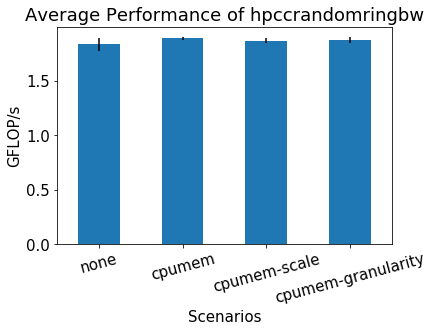

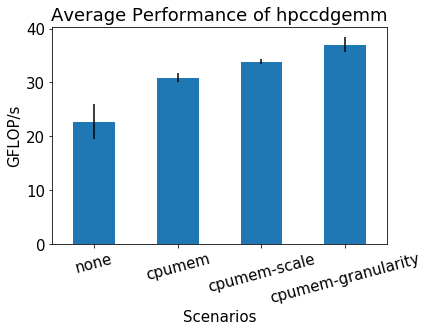

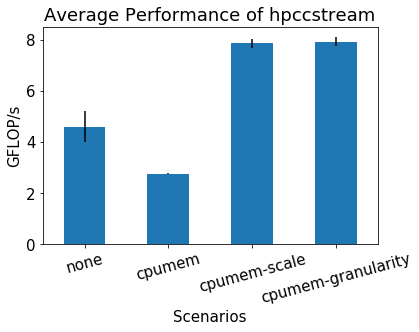

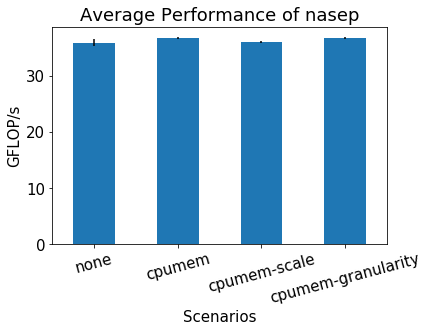

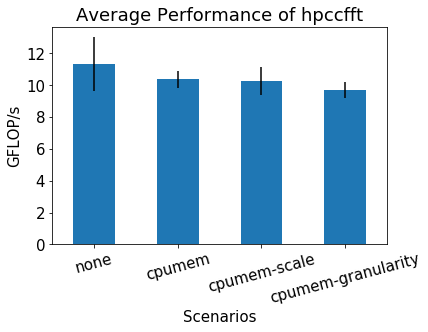

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Performance of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("GFLOP/s")
    
    plt.savefig('performance-'+model_name+'.pdf',bbox_inches='tight',pad_inches=0.1)

#  time

In [5]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["time.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_time=df
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
0,hpccrandomringbw,16,1,1,150.75,180.275310,602.75,91.562479,0.00,0.000000,792.690174,108.431493,none
1,hpccdgemm,16,1,1,184.50,234.632159,1719.25,187.926016,0.00,0.000000,1940.661177,145.888678,none
2,hpccstream,16,1,1,169.50,230.176563,339.25,57.755411,0.00,0.000000,541.717556,254.577077,none
3,nasep,16,1,1,226.50,223.014013,968.00,16.170962,0.50,0.500000,1232.108647,236.929153,none
4,hpccfft,16,1,1,246.00,242.808567,227.00,25.029982,0.00,0.000000,509.612925,238.008520,none
5,hpccrandomringbw,16,1,1,155.25,184.337157,432.25,5.584577,0.25,0.433013,621.706815,187.097965,cpumem
6,hpccdgemm,16,1,1,142.50,147.562699,1178.25,28.760868,0.50,0.500000,1359.132415,134.197902,cpumem
7,hpccstream,16,1,1,119.75,172.302604,436.50,4.153312,0.00,0.000000,594.521093,168.990011,cpumem
8,nasep,16,1,1,197.25,193.792898,948.75,4.437060,0.00,0.000000,1184.391486,194.290066,cpumem
9,hpccfft,16,1,1,87.50,102.470728,232.50,2.692582,0.00,0.000000,355.221383,99.376437,cpumem


           benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  \
0   hpccrandomringbw      16       1         1     150.75  180.275310   
5   hpccrandomringbw      16       1         1     155.25  184.337157   
10  hpccrandomringbw      16       1         1     170.25  208.307915   
15  hpccrandomringbw      16       1         1     160.75  188.278218   

    run_mean    run_std  final_mean  final_std  duration_mean  duration_std  \
0     602.75  91.562479        0.00   0.000000     792.690174    108.431493   
5     432.25   5.584577        0.25   0.433013     621.706815    187.097965   
10    438.75   5.629165        0.00   0.000000     645.164401    212.627061   
15    437.00   7.245688        0.00   0.000000     634.042851    194.357601   

              scenario  
0                 none  
5               cpumem  
10        cpumem-scale  
15  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  run_mean  \
1   hpccdgemm      16       1        

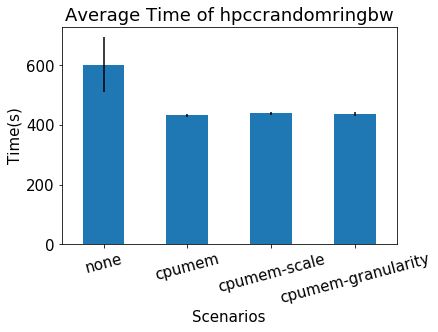

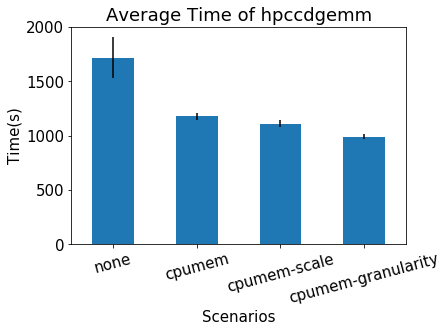

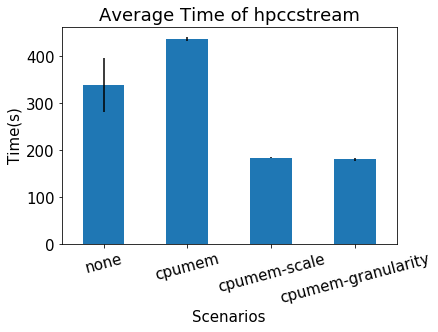

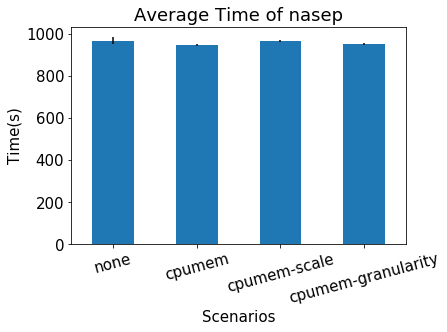

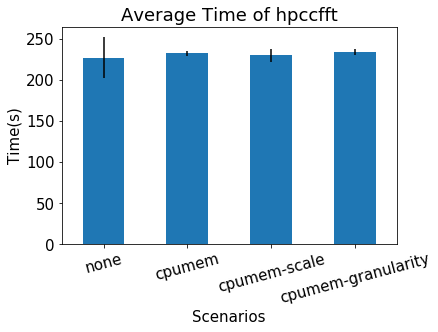

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='run_mean',
                  yerr='run_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Time of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("Time(s)")
    
    plt.savefig('time-'+model_name+'.pdf',bbox_inches='tight',pad_inches=0.1)

#  time slot

In [7]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["appsum.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)

In [8]:
df_time1=df
df_time1

,scenario,init_sum,run_sum,final_sum,duration_sum
0,none,3909.0,15425.0,2.0,20067.161916
1,cpumem,2809.0,12913.0,3.0,16459.892767
2,cpumem-scale,2376.0,11720.0,1.0,14866.270597
3,cpumem-granularity,2291.0,11192.0,2.0,14289.275661


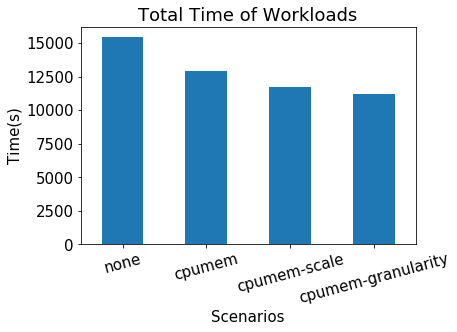

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# for model_name in df_time1['benchmark'].unique():
#     df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
# df_bench['run_sum'] = df_time1['run_sum']

# plot grouped bar chart
df_time1.plot(x='scenario',
              y='run_sum',
                kind='bar',
                stacked=True,
                title=f"Total Time of Workloads",
             legend=None)
plt.xticks(rotation=15) 
plt.xlabel("Scenarios")
plt.ylabel("Time(s)")
    
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)

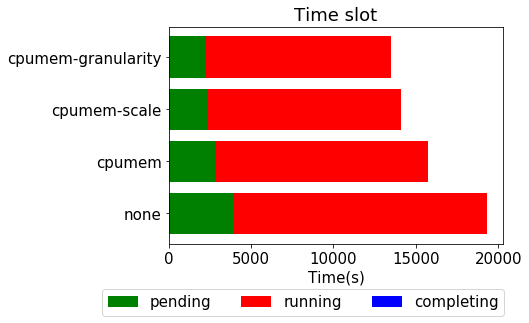

In [40]:
import numpy as np
import matplotlib.pyplot as plt

color=['green','red','blue']

y2 = df_time1['init_sum']
y3 = df_time1['run_sum']
y4 = df_time1['final_sum']

labels = df_time1['scenario']

plt.barh(labels, y2, color='green', label='pending')
plt.barh(labels, y3, left=y2, color='red', label='running')
plt.barh(labels, y4, left=y2+y3, color='blue', label='completing')

# plt.xlim((0,25000))                                                            #x轴标题
plt.legend(loc=[-0.2, -0.33], ncol=3)                                                           #图例的显示位置设置
plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
# plt.legend(loc=[1, 0])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
# plt.show()
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)